Python script to use genes from the Differential Expression Analysis (DEA) results to build a knowledge driven machine learning model. The goal is to establish some rules in function of the expression of the most significantly different genes to recognize each cell type.

# Import

In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input

Anndata object with transcription data which are normalized, Log1p transformed, batch corrected and only the most 350 variables genes are kept.

In [2]:
adata= ad.read_h5ad("/disk2/user/cormey/outputs/Transcription_objects/034_RJ")

# Output

Some graphs to visualize the performance of the machine learning and the quality of the data

# Remove outs cells from the dataset

In [3]:
# Define the cell type to filter out
cell_type_to_remove = 'Out'

# Create a boolean mask for rows where the cell type is not 'out'
mask = adata.obs['annotation'] != cell_type_to_remove

# Apply the mask to subset the AnnData object
adata = adata[mask, :]

# Transform the dataset to keep only data about the most significantly different genes

In [4]:
up_regulated_genes=['ENSG00000156234',
 'ENSG00000189058',
 'ENSG00000211892',
 'ENSG00000211896',
 'ENSG00000211677',
 'ENSG00000211592',
 'ENSG00000211675',
 'ENSG00000164692',
 'ENSG00000211892',
 'ENSG00000211592',
 'ENSG00000211675',
 'ENSG00000164692',
 'ENSG00000108821',
 'ENSG00000189058',
 'ENSG00000168542',
 'ENSG00000211679',
 'ENSG00000206503',
 'ENSG00000189058',
 'ENSG00000102265',
 'ENSG00000124935',
 'ENSG00000142102',
 'ENSG00000196405',
 'ENSG00000174444',
 'ENSG00000185499',
 'ENSG00000161016',
 'ENSG00000160180',
 'ENSG00000139625',
 'ENSG00000221978',
 'ENSG00000187954',
 'ENSG00000206503',
 'ENSG00000176978',
 'ENSG00000162585',
 'ENSG00000108465',
 'ENSG00000158106',
 'ENSG00000204580',
 'ENSG00000124935',
 'ENSG00000115486',
 'ENSG00000092820',
 'ENSG00000138495',
 'ENSG00000167283',
 'ENSG00000160972',
 'ENSG00000182087',
 'ENSG00000203667',
 'ENSG00000147684',
 'ENSG00000173272',
 'ENSG00000143248',
 'ENSG00000172551',
 'ENSG00000128422',
 'ENSG00000129351',
 'ENSG00000174903']
down_regulated_genes=['ENSG00000174444',
 'ENSG00000196405',
 'ENSG00000142102',
 'ENSG00000211896',
 'ENSG00000111639',
 'ENSG00000100387',
 'ENSG00000160972',
 'ENSG00000172551',
 'ENSG00000117523',
 'ENSG00000140983',
 'ENSG00000155096',
 'ENSG00000108465',
 'ENSG00000130066',
 'ENSG00000133639',
 'ENSG00000174903',
 'ENSG00000203667',
 'ENSG00000181029',
 'ENSG00000138495',
 'ENSG00000211677',
 'ENSG00000115486',
 'ENSG00000030582',
 'ENSG00000139625',
 'ENSG00000158106',
 'ENSG00000182087',
 'ENSG00000128422',
 'ENSG00000147684',
 'ENSG00000092820',
 'ENSG00000112081',
 'ENSG00000173272',
 'ENSG00000176978',
 'ENSG00000110958',
 'ENSG00000167283',
 'ENSG00000204580',
 'ENSG00000187954',
 'ENSG00000211675',
 'ENSG00000162585',
 'ENSG00000221978',
 'ENSG00000143248',
 'ENSG00000221983',
 'ENSG00000211592',
 'ENSG00000160180',
 'ENSG00000196405',
 'ENSG00000142102',
 'ENSG00000174444',
 'ENSG00000206503',
 'ENSG00000185499',
 'ENSG00000211892',
 'ENSG00000161016',
 'ENSG00000132465',
 'ENSG00000168542',
 'ENSG00000108821',
 'ENSG00000164692',
 'ENSG00000189058']

In [5]:
gene_list=[]
for gene in down_regulated_genes:
    gene_list.append(gene)
for gene in up_regulated_genes:
    if gene not in gene_list: #Ensure we don't have 2 times the same gene
        gene_list.append(gene)
# Get indices of genes in gene_list that are present in var_names
gene_indices = np.where(np.isin(adata.var_names, gene_list))[0]
# Filter X matrix
filtered_X = adata.X[:, gene_indices]
adata = adata[:, gene_indices]  # Update adata with filtered X matrix

In [6]:
adata

View of AnnData object with n_obs × n_vars = 9390 × 55
    obs: 'batch', 'annotation'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p'

In [7]:
#List of the 10 most important genes in random forest model
liste=['ENSG00000164692',
 'ENSG00000189058',
 'ENSG00000108821',
 'ENSG00000160180',
 'ENSG00000211592',
 'ENSG00000174444',
 'ENSG00000161016',
 'ENSG00000221983',
 'ENSG00000124935',
 'ENSG00000211892']

In [8]:
x=0
for gene in liste:
    if gene in gene_list:
        x+=1

print(x)

10


In [9]:
# All the most important genes are in the list selected

# Input the list of genes specifics to each cell types

In [10]:
S_genes_down= ['ENSG00000100387', 'ENSG00000160972', 'ENSG00000172551', 'ENSG00000140983', 'ENSG00000203667', 'ENSG00000138495',
 'ENSG00000115486', 'ENSG00000139625', 'ENSG00000158106', 'ENSG00000128422', 'ENSG00000176978', 'ENSG00000204580', 'ENSG00000187954',
 'ENSG00000162585', 'ENSG00000143248', 'ENSG00000142102', 'ENSG00000206503']

In [11]:
T_genes_down= ['ENSG00000189058']

In [12]:
M_genes_down= ['ENSG00000142102']

In [13]:
T_genes_up=['ENSG00000142102', 'ENSG00000196405', 'ENSG00000139625', 'ENSG00000108465', 'ENSG00000158106', 'ENSG00000115486',
 'ENSG00000138495', 'ENSG00000160972']

In [14]:
M_genes_up=['ENSG00000211892', 'ENSG00000211679']

In [15]:
I_genes_up=['ENSG00000211892', 'ENSG00000211896', 'ENSG00000211677']

In [107]:
#Function to find the mean expression value for a list of gene and for a cell type
#Permit to find good parameters to distinguish different cell types

def identify_mean_by_cell_type(liste_gene, annotation): 

    cells = adata[adata.obs["annotation"] == annotation] #choose a cell type to evaluate its mean value for certain genes
    
    S2_genes=[]
    
    # Filter genes of interest
    gene_indices = [cells.var_names.get_loc(gene) for gene in liste_gene]
    X_filtered = cells.X[:, gene_indices]
    X_filtered=X_filtered.toarray()
    
    # Calculate mean and std
    mean_values = np.mean(X_filtered, axis=0)
    std_values = np.std(X_filtered, axis=0)
    
    # Stock in dataframe
    results = pd.DataFrame({
        'Gene': liste_gene,
        'Mean': mean_values,
        'Standard Deviation': std_values
    })
    
    #Select only stromal genes with a std_value < 0.2 and a mean value < 0.1
    #results=results[results["Mean"]<0.1]
    #results=results[results["Standard Deviation"]<0.2]
    
    #for gene in results["Gene"]:
        #S2_genes.append(gene)
    
    return(np.mean(results["Mean"], axis=0))

In [108]:
print(identify_mean_by_cell_type(S_genes_down, "Tumor"))
print(identify_mean_by_cell_type(S_genes_down, "Mixed"))
print(identify_mean_by_cell_type(S_genes_down, "Fat"))
print(identify_mean_by_cell_type(S_genes_down, "Immune cells"))
print(identify_mean_by_cell_type(S_genes_down, "Stroma"))
print(identify_mean_by_cell_type(S_genes_down, "Benign breast"))

0.07746110233680917
0.059355660666561165
0.05322895799357024
0.06038372868218128
0.04378882955995926
nan


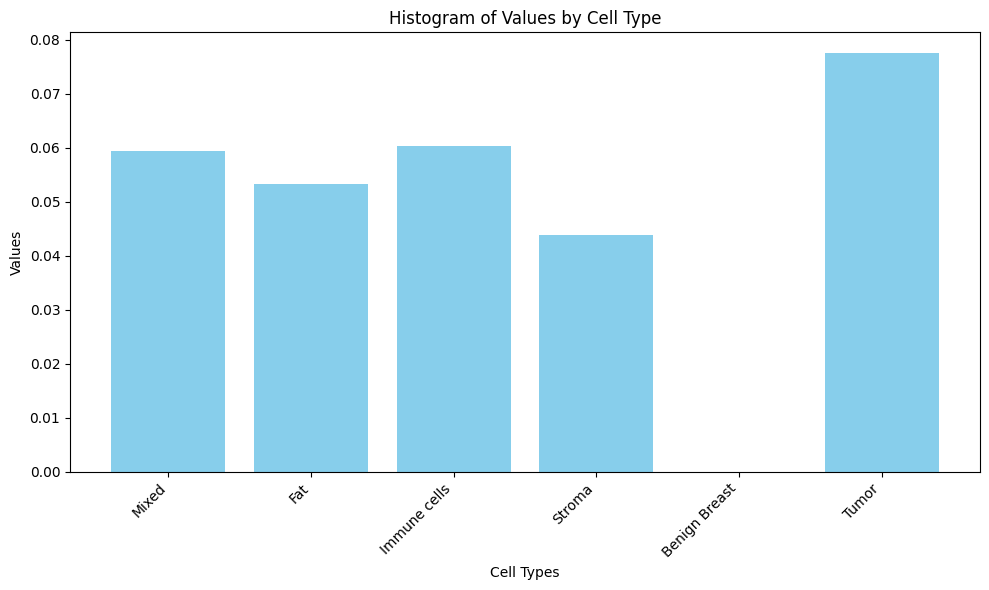

In [109]:
# List of annotations to evaluate
annotations = ["Mixed", "Fat", "Immune cells", "Stroma", "Benign breast", "Tumor"]
all_results = {}

# Collect the results for each annotation
for annotation in annotations:
    results = identify_mean_by_cell_type(S_genes_down, annotation)
    if results==None:
        results=0
    all_results[annotation] = results

keys = list(all_results.keys())
values = list(all_results.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

plt.xlabel('Cell Types')
plt.ylabel('Values')
plt.title('Histogram of Values by Cell Type')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Establish some rules 

## Stroma cells

In [82]:
def stroma_evaluation(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(S_genes_down)]
    average_value = np.mean(values_of_interest)
    if average_value<0.045:
        return True
    else:
        return False

## Tumor cells

In [47]:
def tumor_evaluation_up(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(T_genes_up)]
    average_value = np.mean(values_of_interest)
    if average_value>0.09:
        return True
    else:
        return False

In [50]:
def tumor_evaluation_down(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(T_genes_down)]
    average_value = np.mean(values_of_interest)
    if average_value<0.30:
        return True
    else:
        return False

## Immune cells

In [42]:
def immune_evaluation_up(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(I_genes_up)]
    average_value = np.mean(values_of_interest)
    if average_value>0.41:
        return True
    else:
        return False

## Benign Breast

In [55]:
def breast_evaluation_up(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(T_genes_down)]
    average_value = np.mean(values_of_interest)
    if average_value==None:
        return True
    else:
        return False

## Fat cells

## Mixed cells

In [37]:
def mixed_evaluation_up(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(M_genes_up)]
    average_value = np.mean(values_of_interest)
    if average_value>0.47 and average_value<0.54:
        return True
    else:
        return False

In [53]:
def mixed_evaluation_down(row_index):
    values_of_interest = adata.X[row_index, adata.var_names.isin(M_genes_down)]
    average_value = np.mean(values_of_interest)
    if average_value<0.14:
        return True
    else:
        return False

# Perform the Machine Learning

In [114]:
# Access the observation metadata
obs_metadata = adata.obs
dico_results={
"Stroma":0,
"Immune cells":0,
"Tumor":0,
"Mixed":0,
"Benign Breast":0,
"Fat":0
}
V=0
F=0

# Loop through all rows of the matrix
#for i in range(adata.X.shape[0]):
for i in range(10):
    SV=0
    IV=0
    TV=0
    MV=0
    BV=0
    FV=0
    # Access the data for row i
    if stroma_evaluation(i)==True:
        SV=0.4
    if tumor_evaluation_up(i)==True:
        TV=0.6
    if tumor_evaluation_down(i)==True:
        TV+=0.6
    if immune_evaluation_up(i)==True:
        IV=0.6
    if breast_evaluation_up(i)==True:
        BV=1
    if mixed_evaluation_up(i)==True:
        MV=0.5
    if mixed_evaluation_down(i)==True:
        MV+=0.5
    variables = {'Stroma': SV, 'Immune cells': IV, 'Tumor': TV, 'Mixed': MV, 'Benign Breast': BV, 'Fat': FV}
    print(variables)
    max_variable = max(variables, key=variables.get)
    
    # Access the metadata for the observation in row i
    obs_data = obs_metadata.iloc[i]  # Assuming 'obs_metadata' is a Pandas dataframe
    if obs_data["annotation"]==max_variable:
        V+=1
    else:
        dico_results[max_variable]+=1
        print(max_variable+" ne correspond pas à "+obs_data["annotation"])
        F+=1
print(V)
print(F)

{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0.6, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Mixed ne correspond pas à Benign breast
{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Mixed ne correspond pas à Tumor
{'Stroma': 0, 'Immune cells': 0, 'Tumor': 0.6, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Tumor ne correspond pas à Mixed
{'Stroma': 0, 'Immune cells': 0, 'Tumor': 0, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Mixed ne correspond pas à Stroma
{'Stroma': 0, 'Immune cells': 0, 'Tumor': 0.6, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Tumor ne correspond pas à Mixed
{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0.6, 'Mixed': 0.5, 'Benign Breast': 0, 'Fat': 0}
Tumor ne correspond pas à Mixed
{'Stroma': 0.4, 'Immune cells': 0, 'Tumor': 0, 'Mixed': 0.5, 'Benign 

In [61]:
3602/(3602+5813)

0.38258098778544875

In [99]:
# Access the observation metadata
obs_metadata = adata.obs
S=0
I=0
T=0
M=0
B=0
F=0

# Loop through all rows of the matrix
for i in range(adata.X.shape[0]):
    # Access the data for row i
    if stroma_evaluation(i)==True:
        cell_type="Stroma"
    
        # Access the metadata for the observation in row i
        obs_data = obs_metadata.iloc[i]  # Assuming 'obs_metadata' is a Pandas dataframe
        if obs_data["annotation"]==cell_type:
            V+=1
        elif obs_data["annotation"]=="Tumor":
            T+=1
        elif obs_data["annotation"]=="Mixed":
            M+=1
        else:
            F+=1
print(V)
print(T)
print(F)

1341
2118
308


In [100]:
print(M)

1098


In [101]:
print(T+V+F+M)

4865


In [53]:
V=0
for i in range(adata.X.shape[0]):
    # Access the data for row i
        cell_type="Stroma"
    
        # Access the metadata for the observation in row i
        obs_data = obs_metadata.iloc[i]  # Assuming 'obs_metadata' is a Pandas dataframe
        if obs_data["annotation"]==cell_type:
            V+=1
print(V)

1987
